<a href="https://colab.research.google.com/github/DanyelMorales/MLLearneerRepo/blob/main/PredictionUsingCalculusGradeDescendent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

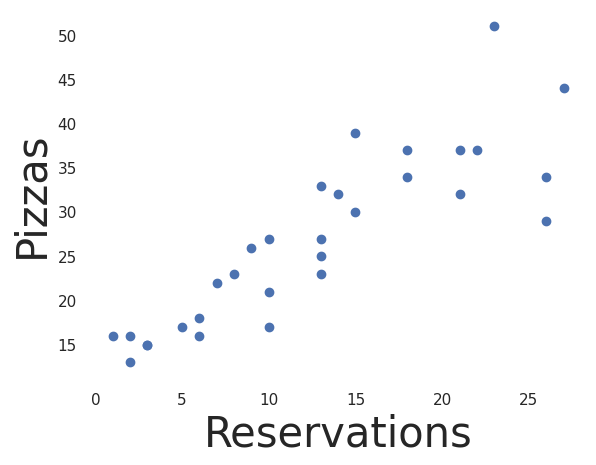

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import seaborn as sns
# Import math Library
import math
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
xLabel = "Reservations"
yLabel = "Pizzas"


plt.ion()
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

X,Y =np.loadtxt("https://raw.githubusercontent.com/DanyelMorales/MLLearneerRepo/main/dataset/pizza.txt",skiprows=1, unpack=True)
plt.xlabel(xLabel, fontsize=30)
plt.ylabel(yLabel,fontsize=30)
ax.plot(X,Y, "bo")

def graph(X1,Y1, id):
    ax.set_xlim(0, id)
    ax.cla()
    ax.plot(X1,Y1, "bo")
    line1, = ax.plot(X1,X1, 'b-')
    display(fig)
    clear_output(wait = True)
    plt.pause(0.5)
    return line1


def updateLine(X1,Y1,theLine):
    theLine.set_ydata(Y1)
    theLine.set_xdata(X1)
    display(fig)
    clear_output(wait = True)
    #plt.pause(0.5)



In [31]:
def showHistory(X,Y,historyW, step=2):
  theLine=graph(X,Y,1)
  updateLineL = lambda w :  updateLine(X,predict(X,w[0],w[1]),theLine)
  for i in range(0,len(historyW),step):
    w=historyW[i]
    updateLineL(w)
  updateLineL(historyW[-1])

def predict(X, w,b):
  return X * w + b

def loss(X,Y,w,b):
  error = predict(X,w,b)-Y
  squared_error = error ** 2
  return np.average(squared_error)

def gradient(X,Y,w,b):
  w_gradient = 2 * np.average(X * (predict(X,w,b) - Y))
  b_gradient = 2 * np.average((predict(X,w,b) - Y))
  return (w_gradient,  b_gradient)

def train(iterations, X,Y, lr):
  w=b=0
  historyW=[]
  previousLoss = loss(X,Y,w,b)
  historyW.append([w,b,previousLoss])
  for i in range(iterations):
    print(f"iteration:{i} w={w} b={b} loss:{previousLoss}")
    w_gradient, b_gradient = gradient(X,Y, w,b)
    w -= w_gradient * lr
    b -= b_gradient * lr
    historyW.append([w,b,previousLoss])
    previousLoss=loss(X,Y,w,b)
  return [w,b, historyW]


w,b, history =train(20000, X,Y, 0.001)
print(f"\nw={w}, b={b}")
print(f"Prediction: x=20, Y=>{predict(20, w,b)}")


Streaming output truncated to the last 5000 lines.
iteration:15003 w=1.0813716193737413 b=13.168102002882359 loss:22.84274208784679
iteration:15004 w=1.081371481329439 b=13.168104384519125 loss:22.842742082157038
iteration:15005 w=1.0813713433585255 b=13.16810676488974 loss:22.84274207647336
iteration:15006 w=1.0813712054609612 b=13.16810914399488 loss:22.842742070795715
iteration:15007 w=1.0813710676367077 b=13.168111521835211 loss:22.842742065124103
iteration:15008 w=1.0813709298857257 b=13.168113898411411 loss:22.842742059458523
iteration:15009 w=1.0813707922079763 b=13.16811627372415 loss:22.84274205379897
iteration:15010 w=1.0813706546034207 b=13.1681186477741 loss:22.84274204814541
iteration:15011 w=1.08137051707202 b=13.168121020561932 loss:22.842742042497875
iteration:15012 w=1.081370379613735 b=13.168123392088317 loss:22.842742036856347
iteration:15013 w=1.0813702422285272 b=13.168125762353926 loss:22.84274203122082
iteration:15014 w=1.0813701049163575 b=13.168128131359428 los

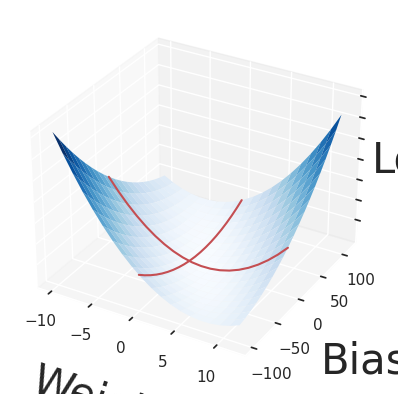

In [38]:
history = np.array(history)
history_w = history[:, 0]
history_b = history[:, 1]
history_loss = history[:, 2]

# Prepare matrices for 3D plot (W, B and L for weights, biases and losses)
MESH_SIZE = 20
weights = np.linspace(np.min(history_w) - 10, np.max(history_w) + 10,
                      MESH_SIZE)
biases = np.linspace(np.min(history_b) - 100, np.max(history_b) + 100,
                     MESH_SIZE)
W, B = np.meshgrid(weights, biases)
losses = np.array([loss(X, Y, w, b) for w, b in zip(np.ravel(W), np.ravel(B))])
L = losses.reshape((MESH_SIZE, MESH_SIZE))

# Plot surface
sns.set(rc={"axes.facecolor": "white", "figure.facecolor": "white"})
ax = plt.figure().add_subplot(projection="3d")
ax.set_zticklabels(())
ax.set_xlabel("Weight", labelpad=20, fontsize=30)
ax.set_ylabel("Bias", labelpad=20, fontsize=30)
ax.set_zlabel("Loss", labelpad=5, fontsize=30)
ax.plot_surface(W, B, L, cmap=cm.Blues, linewidth=0, antialiased=True)

# Trace the partial derivative "slices"
plt.plot(weights, [history_b[0] for w in weights],
         [loss(X, Y, w, history_b[0]) for w in weights], color="r")
plt.plot([history_w[0] for b in biases], biases,
         [loss(X, Y, history_w[0], b) for b in biases], color="r")

# Display plot
plt.show()